## Problem Description

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

### Importing the Dataset

In [2]:
df = pd.read_csv('Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### About the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.shape

(4177, 9)

In [6]:
df['Age'] = df['Rings']+1.5
df = df.drop('Rings', axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


#### Inferences:
1. There are no null values.
2. Only height has minimum value as 0, all others are good to go.
3. All the features have different scales for measurement.
4. The new column Age is introduced as our target feature as mentioned in the document of the Dataset.
5. All the features are numerical except Sex.

### Exploratory Data Analysis
### Univariate Analysis

C:\Users\91880\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\91880\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\91880\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\91880\Anaconda3\lib\site-packages\pandas\plotting\_matpl

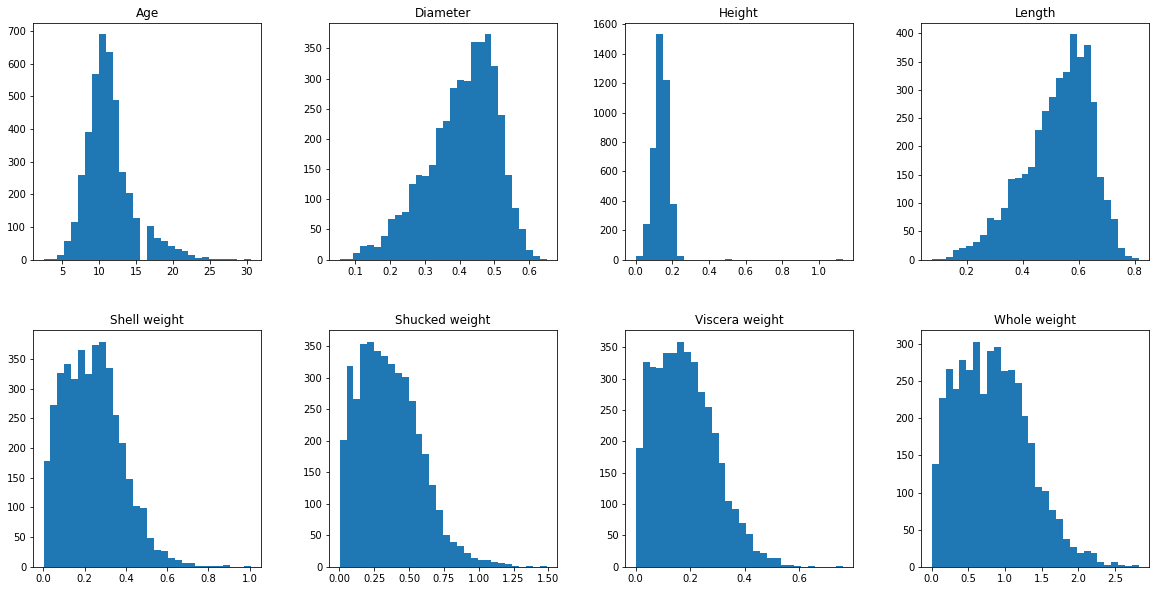

In [8]:
df.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

In [9]:
Numerical = df.select_dtypes(include=[np.number]).columns
Categorical = df.select_dtypes(include=[np.object]).columns

In [10]:
skew_values = skew(df[Numerical], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(Numerical), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


The skewness in features are more than 0, it means that the weight of the data is more towards the right tail of the distribution. Specially Height and Age. For Normally distributed data the skewness should be about 0.

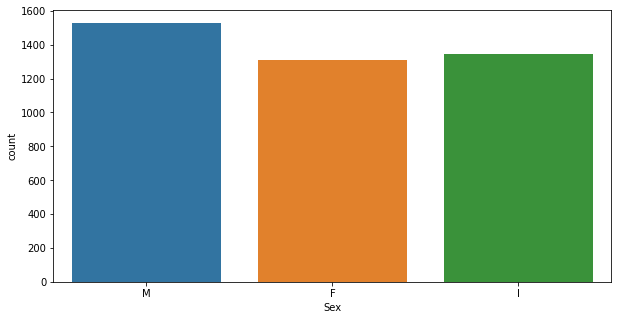

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.show()

The males have the highest number followed by Infants with very close margin.

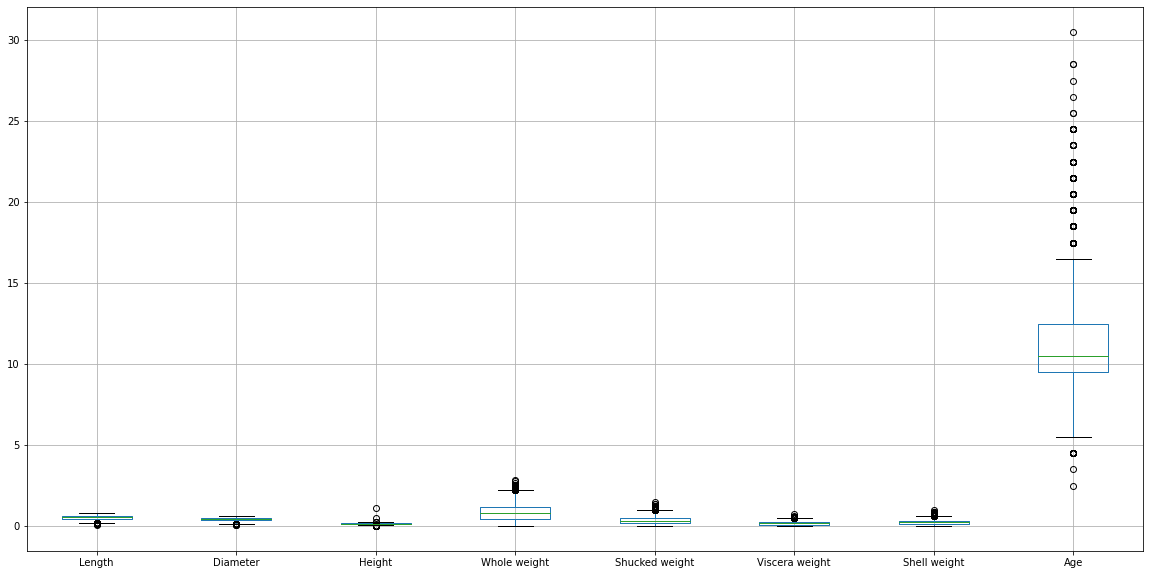

In [12]:
df.boxplot(figsize=(20,10))
plt.show()

The Age or the target feature has a lot of outliers, so does some other features. This is the reason probable why these features are not normally distributed.

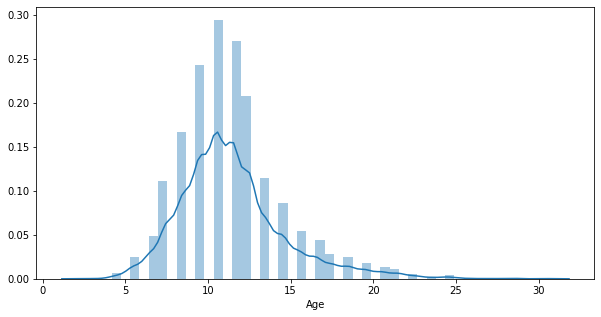

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])
plt.show()

Right skewed as predicted.

### Bivariate Analysis

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


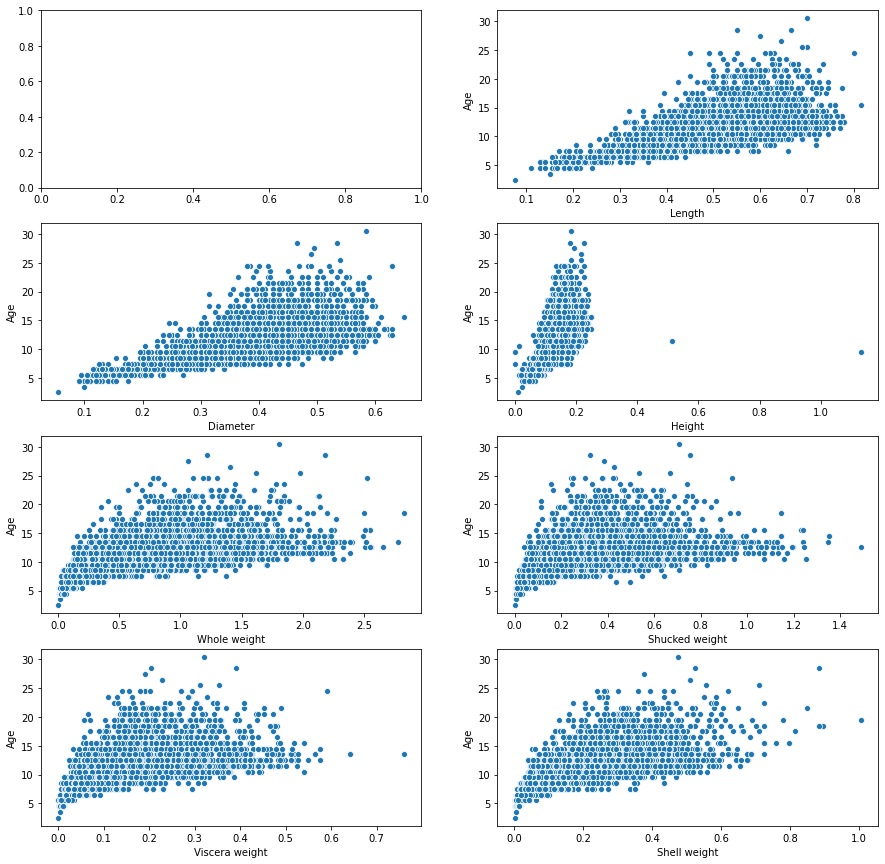

In [15]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.scatterplot(x=df.iloc[:,i], y=df['Age'], ax=axes[i])

plt.show()

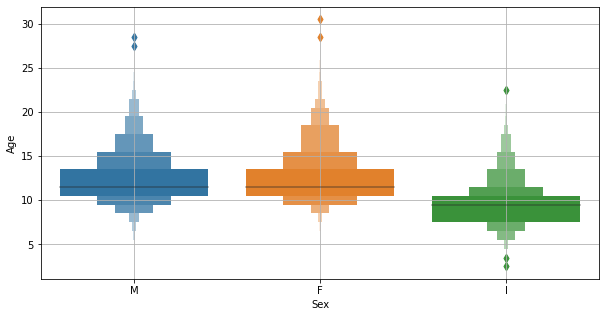

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,12.629304,3.104256,6.5,10.5,11.5,13.5,30.5
I,1342.0,9.390462,2.511554,2.5,7.5,9.5,10.5,22.5
M,1528.0,12.205497,3.026349,4.5,10.5,11.5,13.5,28.5


In [16]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=df['Age'], x=df['Sex'])
plt.grid()
plt.show()

df.groupby('Sex')['Age'].describe()

- Male : age majority lies in between 7.5 years to 19 years
- Female: age majority lies in between 8 years to 19 years
- Immature: age majority lies in between 6 years to < 10 years

### Multivariate Analysis

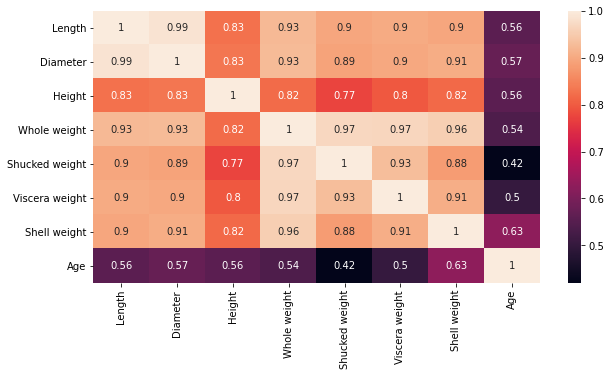

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Whole Weight is almost linearly varying with all other features except age
- Height has least linearity with remaining features
- Age is most linearly proprtional with Shell Weight followed by Diameter and length
- Age is least correlated with Shucked Weight

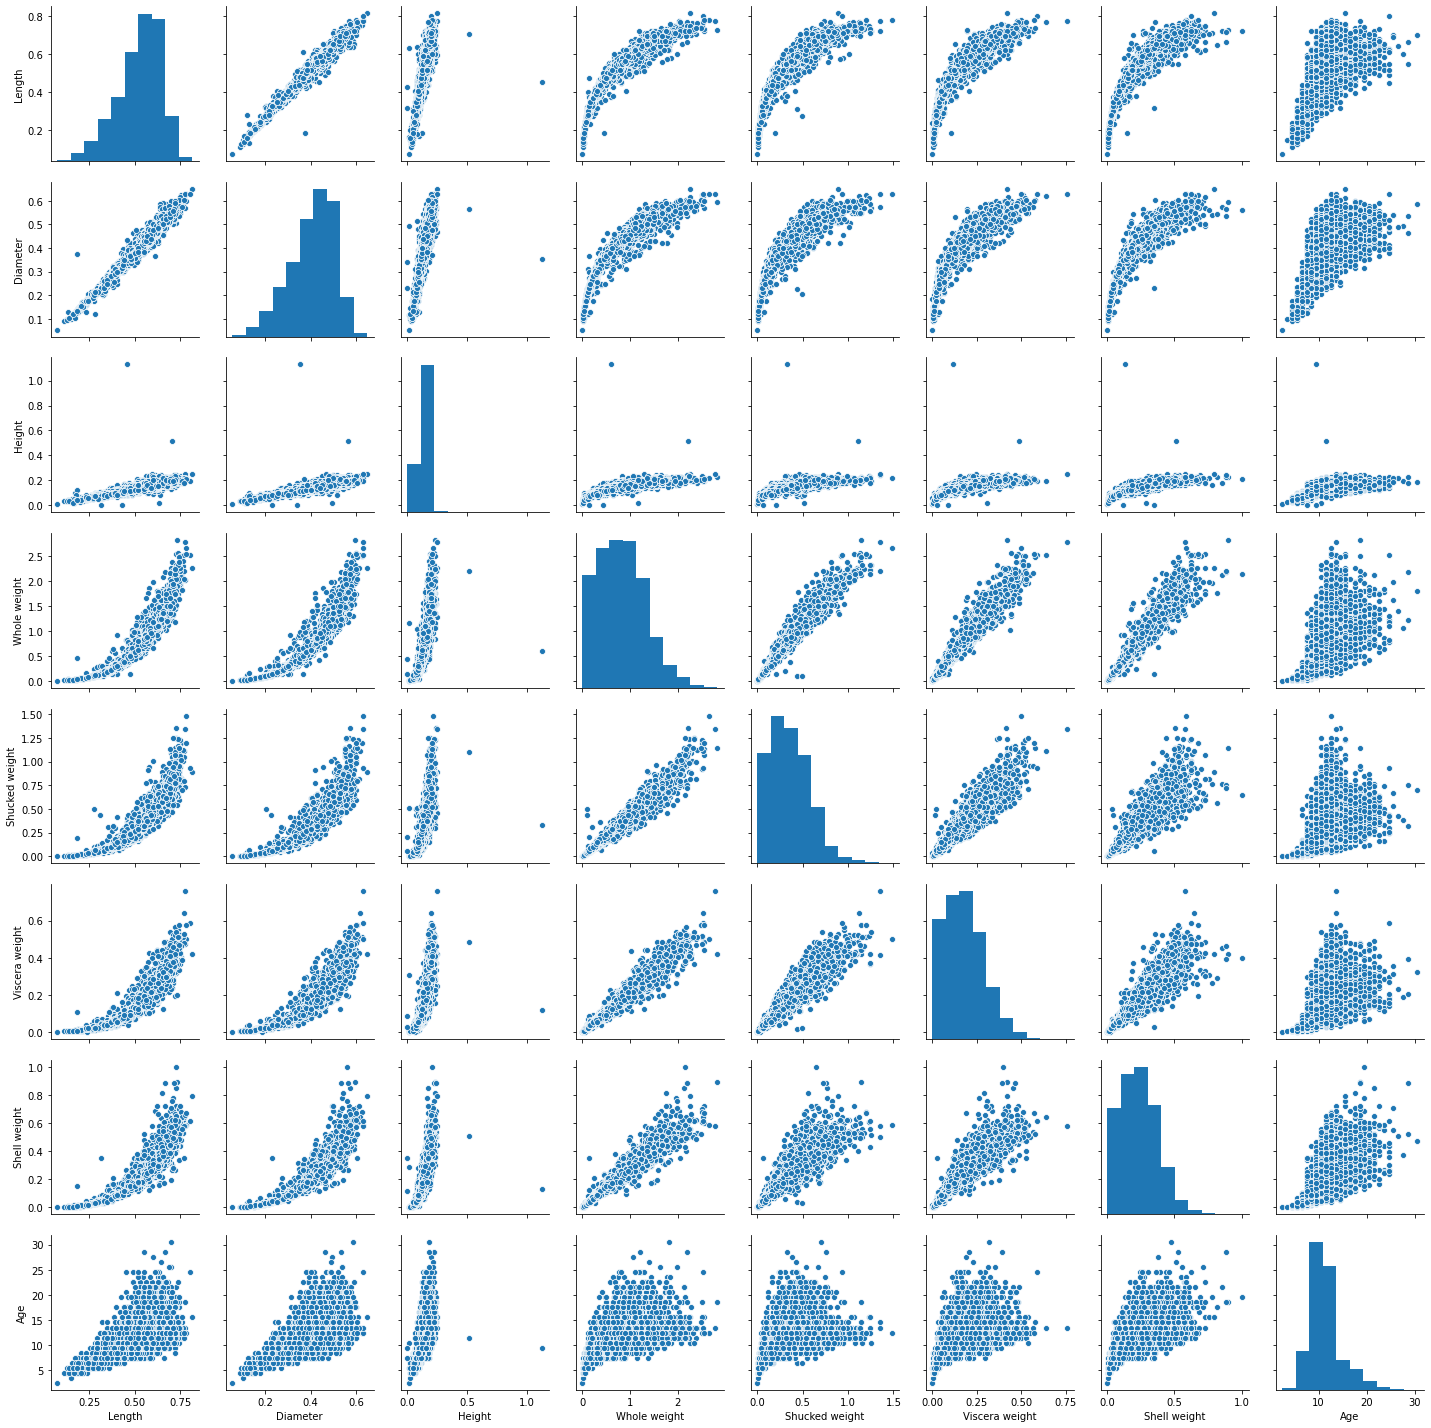

In [18]:
sns.pairplot(df)
plt.show()

Age can be seen linear with most of the variables, but we need to confirm it in order to be sure.

## Preprocessing
#### Handling Categorical features

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


## Statistical Approach

In [20]:
X = df.drop(['Age'], axis=1)
y = df['Age']

import statsmodels.api as sm

Xc = sm.add_constant(X)
lr = sm.OLS(y, Xc).fit()
lr.summary()

C:\Users\91880\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:14:51   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3946      0.292     18.502      0.000       4.823       5.966
Length            -0.4583      1.809     -0.253      0.800      -4.005       3.089
Diameter          11.0751      2.227      4.972      0.000       6.708      15.442
Height            10.7615      1.536      7.005      0.000       7.750      13.773
Whole weight       8.9754      0.725     12.373      0.000       7.553      10.398
Shucked weight   -19.7869      0.817    -24.209      0.000     -21.389     -18.184
Viscera weight   -10.5818      1.294     -8.179      0.000     -13.118      -8.045
Shell weight       8.7418      1.125      7.772      0.000       6.537      10.947
Sex_I             -0.8249      0.102     -8.056      0.000      -1.026      -0.624
Sex_M              0.0577      0.083      0.692      0.489      -0.106       0.221
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R squared value is low in the base model, but it should be noted that R squared value being high is not the only measure for a good model.

Also we need to check on the assumptions of Linear Regression before we check the Model's performance.

### Linear Regression Assumptions

#### Check for Multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index=Xc.columns, columns=['VIF'])

,VIF
const,73.759239
Length,40.945763
Diameter,42.379841
Height,3.581369
Whole weight,109.768710
Shucked weight,28.550546
Viscera weight,17.445012
Shell weight,21.263272
Sex_I,1.983709
Sex_M,1.398273


Many features have very high VIF values. This does not seems good, for our model we have put a threshhold of 5-10.

We will remove these features one by one and then check the VIF values again in order to be sure we do not remove any important feature.

In [22]:
X2 = X.drop(['Whole weight'], axis=1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,73.686878
Length,40.940595
Diameter,42.362677
Height,3.580291
Shucked weight,8.953621
Viscera weight,10.866542
Shell weight,7.824157
Sex_I,1.980900
Sex_M,1.398218


We can see that just removing Whole Weight was not enough, we need to iterate this process.

In [23]:
X2 = X.drop(['Whole weight','Diameter'], axis=1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,73.574600
Length,8.071189
Height,3.539481
Shucked weight,8.952049
Viscera weight,10.849613
Shell weight,7.479367
Sex_I,1.957221
Sex_M,1.397178


In [24]:
X2 = X.drop(['Whole weight','Diameter','Viscera weight'], axis=1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,72.180555
Length,7.836960
Height,3.524719
Shucked weight,6.154361
Shell weight,6.665183
Sex_I,1.928554
Sex_M,1.392962


Bingo, desirable features at last.

In [25]:
lr = sm.OLS(y, X2c).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     746.3
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:14:51   Log-Likelihood:                -9293.0
No. Observations:                4177   AIC:                         1.860e+04
Df Residuals:                    4170   BIC:                         1.864e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3789      0.295     18.263      0.000       4.801       5.956
Length             7.6264      0.808      9.436      0.000       6.042       9.211
Height            11.8548      1.556      7.618      0.000       8.804      14.906
Shucked weight   -11.6179      0.388    -29.981      0.000     -12.378     -10.858
Shell weight      20.3458      0.643     31.641      0.000      19.085      21.606
Sex_I             -0.9194      0.103     -8.918      0.000      -1.121      -0.717
Sex_M              0.0437      0.085      0.514      0.607      -0.123       0.210
==============================================================================
Omnibus:                     1059.201   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3425.649
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       6.634   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the summary section, Sex_I still has a high pvalue. We will deal with this later.

#### Linearity

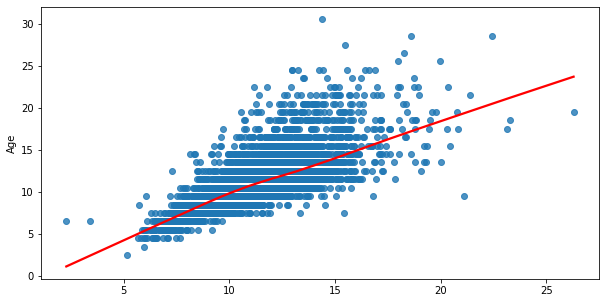

In [26]:
y_pred = lr.predict(X2c)

plt.figure(figsize=(10,5))
sns.regplot(y_pred, y, lowess=True, line_kws={'color':'red'})
plt.show()

By looking at the graph, the problem of linearity does'nt seem to be a problem. But, again the graph cannot be the only judge and it is compulsory to get the statistical analysis.

In [27]:
stat, pval = sm.stats.diagnostic.linear_rainbow(res=lr, frac=0.5)
print(pval)

2.2976245376224182e-45


Oh god..The Linear Rainbow is giving a complete judgement of what was visible.

#### Normality

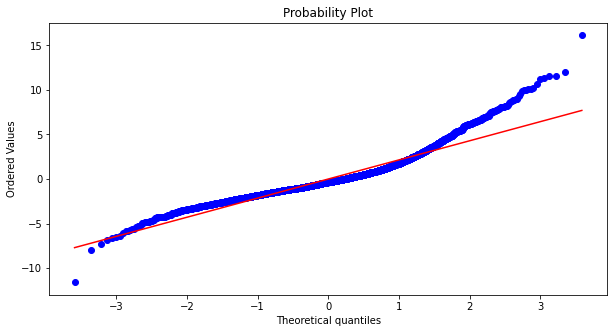

In [28]:
# QQ Plot

from scipy import stats

resid = lr.resid

plt.figure(figsize=(10,5))
stats.probplot(resid, plot=plt)
plt.show()

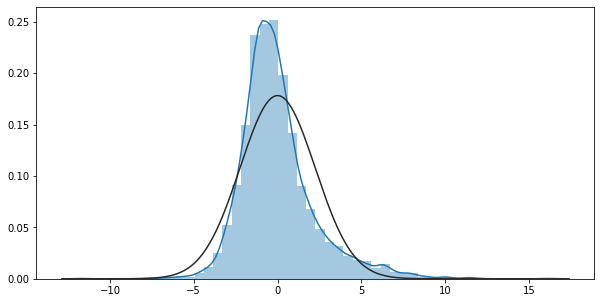

In [29]:
from scipy.stats import norm
norm.fit(resid)

plt.figure(figsize=(10,5))
sns.distplot(resid, fit=norm)
plt.show()

By looking at the plot the residuals do not seem to be Normal, still we will check the normality with the Jarque Bera test.

In [30]:
stat, pval = stats.jarque_bera(resid)
print(pval)

0.0


The p-value also confirms the graphical analysis.

To know for the reason of this abnormality, we see the distribution plot of all the variables.

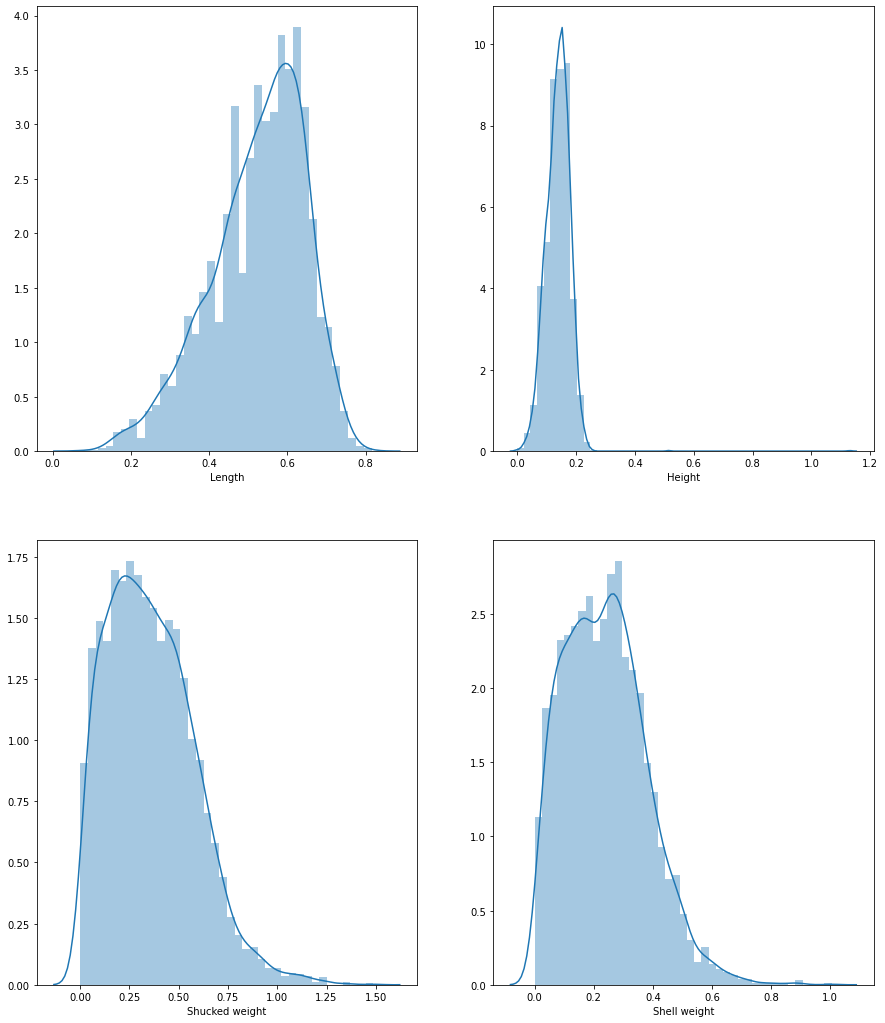

In [31]:
fig, axes = plt.subplots(2,2, figsize=(15,18))
axes = axes.flatten()

for i in range(len(X2.columns)-2):
    sns.distplot(X2.iloc[:,i], ax=axes[i])

plt.show()

#### Homoscedasticity

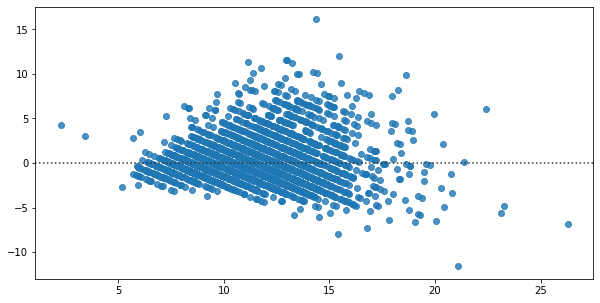

In [32]:
plt.figure(figsize=(10,5))
sns.residplot(lr.predict(),lr.resid)
plt.show()

The graph of the predicted values and residuals shows the increment in variance.

In [33]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(lr.resid, X2c)

(0.880938609303534, 0.9980765442127538, 'increasing')

The pvalue is 0.9980, so it can be said that the variance of error is constant across the range of data.

#### Dropping the features with high p-values

In [34]:
while len(X2.columns)>0:
    X_c = sm.add_constant(X2)
    mod = sm.OLS(y,X_c).fit()
    f = mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        X2 = X2.drop(f, axis=1)
    else:
        break

print("The final features are:",X2.columns)

The final features are: Index(['Length', 'Height', 'Shucked weight', 'Shell weight', 'Sex_I'], dtype='object')


C:\Users\91880\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     895.6
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:14:56   Log-Likelihood:                -9293.2
No. Observations:                4177   AIC:                         1.860e+04
Df Residuals:                    4171   BIC:                         1.864e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.4141      0.286     18.901      0.000       4.852       5.976
Length             7.6066      0.807      9.423      0.000       6.024       9.189
Height            11.8310      1.555      7.606      0.000       8.782      14.880
Shucked weight   -11.6023      0.386    -30.036      0.000     -12.360     -10.845
Shell weight      20.3337      0.643     31.646      0.000      19.074      21.593
Sex_I             -0.9449      0.090    -10.463      0.000      -1.122      -0.768
==============================================================================
Omnibus:                     1057.582   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3415.593
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       6.628   Cond. No.                         57.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
err = mod.resid
mse = np.mean(err**2)
rmse = np.sqrt(mse)

print("The root mean Sq error derived fro the statistical summary is:",rmse)

The root mean Sq error derived fro the statistical summary is: 2.238724888298431


#### RMSE is: 2.238724

## Machine Learning Approach

### Preprocessing

#### Train test split and Standardization

In [37]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


In [38]:
X = df.drop('Age', axis=1)
y = df['Age']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

#### Base Model

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_trains, y_train)
pred = lr.predict(X_tests)

from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 2.2001960901202673
The r2-score is: 0.5136340660091127


Arbitrarily worse model

### Selecting Best Features through RFE

In [40]:
from sklearn.feature_selection import RFE
lr = LinearRegression()
n = [{'n_features_to_select':list(range(1,10))}]
rfe = RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

gsearch.best_params_

{'n_features_to_select': 8}

In [41]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank'])

,Rank
Length,1
Diameter,1
Height,1
Whole weight,1
Shucked weight,1
Viscera weight,1
Shell weight,1
Sex_I,1
Sex_M,2


#### The RFE says that all features are important except Sex_M.

## Regularization Techniques

### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Length,0.000000
Diameter,0.000000
Height,0.000000
Whole weight,2.585918
Shucked weight,-0.000000
Viscera weight,0.000000
Shell weight,0.000000
Sex_I,-1.037811
Sex_M,0.000000


The alpha 0.1 chosen is completely random. We need to tune the hyperparameters of Lassoto reach an optimal alpha.

In [43]:
alphas = np.linspace(0.001, 0.1, 100)
lassocv = LassoCV(alphas=alphas, cv=3, random_state=1, max_iter=5000)
lassocv.fit(X,y)
lassocv.alpha_

0.002

Put the value of this optimal alpha in the regularization to obtain the best coefficients.

Lasso also can be used as a feature selection method as it reduces the values of the undesirable coefficients to 0.
- Lets check the values of the final coefficients.

In [46]:
lasso = Lasso(alpha=lassocv.alpha_, max_iter=5000)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Length,0.000000
Diameter,9.687756
Height,7.720438
Whole weight,7.401358
Shucked weight,-18.204841
Viscera weight,-6.730544
Shell weight,10.200850
Sex_I,-0.856254
Sex_M,0.040596


In [47]:
from sklearn.model_selection import cross_val_score

res = cross_val_score(lasso, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_lasso = np.sqrt(abs(res))
print("The RMSE for Lasso regression is:",rmse_lasso.mean())

The RMSE for Lasso regression is: 2.241566647754436


#### RMSE is: 2.2415

### Ridge Regression

In [48]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge(alpha=0.5)
ridge.fit(X, y)
pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Length,1.662523
Diameter,8.249772
Height,9.065371
Whole weight,7.803305
Shucked weight,-18.479799
Viscera weight,-8.573890
Shell weight,9.894359
Sex_I,-0.859168
Sex_M,0.046933


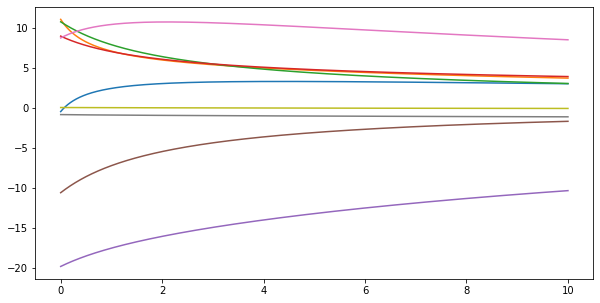

In [49]:
alphas = np.logspace(-3,1,1000)
coefs = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.figure(figsize=(10,5))    
plt.plot(alphas, coefs)
plt.show()

Checking for optimal alpha.

In [50]:
alphas = np.logspace(-2,0,1000)
ridgecv = RidgeCV(alphas=alphas, cv=3)
ridgecv.fit(X,y)
ridgecv.alpha_

0.7142559285543126

In [51]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X,y)
pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Length,2.075084
Diameter,7.660676
Height,8.516607
Whole weight,7.439160
Shucked weight,-18.029800
Viscera weight,-7.926268
Shell weight,10.173322
Sex_I,-0.870323
Sex_M,0.042939


In [52]:
res = cross_val_score(ridge, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_ridge = np.sqrt(abs(res))
print("The RMSE for Ridge regression is:",rmse_ridge.mean())

The RMSE for Ridge regression is: 2.2333057433290833


#### RMSE is: 2.2333

### Rsme of Other Algorithms:

#### We will check the performance of our model by applying various advanced algorithms and see how the Superstars perform in this condition.

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [   SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4)]
results = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(models,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" % (name, rmse)
    print(msg)

SVM: 2.306551
Random Forest: 2.225090
Gradient Boost: 2.194780
K-Nearest Neighbors: 2.353608


#### The other models are also performing similarly, with gradient boosting giving the best results.

# Thank You!